<a href="https://colab.research.google.com/github/mathewhall100/fastai-course2019/blob/master/ISIC_skin_lesions_identification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISIC Skin Lesion Identification

Model to identifiy malignant from benign skin lesions. Data (4000 images) was downloaded from the ISIC skin leasion archive  (https://www.isic-archive.com/#!/topWithHeader/onlyHeaderTop/gallery) and split into training and validation sets. 

In [0]:
Currently the model is achieviing a best of around 71% accuarcy in differentiating malignant melanoma from benign lesions.

## Setup

In [0]:
from google.colab import drive
drive.mount("/content/gdrive", force_remount=True)
root_dir = "/content/gdrive/My Drive/"
base_dir = root_dir + 'fastai-v3/'

In [0]:
!pip install nbformat
!pip install nbconvert==5.4.1


In [0]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline

In [0]:
from fastai.vision import *
from fastai.metrics import error_rate
import pandas as pd
from pd import DataFrame

In [0]:
bs = 64
sz = 224

## Get data

In [7]:
PATH = root_dir + "Colab Notebooks/data/ISIC2/" ; PATH


'/content/gdrive/My Drive/Colab Notebooks/data/ISIC2/'

In [8]:
os.listdir(f'{PATH}/train')

['nevi', 'maligmelanoma']

In [9]:
os.listdir(f'{PATH}/valid')

['nevi', 'maligmelanoma']

In [0]:
train_set_mm = os.listdir(f'{PATH}/train/maligmelanoma')
train_set_bn = os.listdir(f'{PATH}/train/nevi')
valid_set_mm = os.listdir(f'{PATH}/valid/maligmelanoma')
valid_set_bn = os.listdir(f'{PATH}/valid/nevi')


In [52]:
print('Number images in data files')
print('---------------------------')
data = {"train": [len(train_set_mm), len(train_set_bn)],
        "valid": [len(valid_set_mm), len(valid_set_bn)]}
frame = pd.DataFrame(data, columns=["train", "validation"], index=["maligmelanoma","nevi"])
frame

Number images in data files
---------------------------


,train,valid
maligmelanoma,1975,193
nevi,1884,216


In [0]:
def plot_one(path, file):
  img = plt.imread(f'{path}/{file}/{files[0]}')
  plt.imshow(img)

In [0]:
def plot_many(pth, file):
  f, axarr = plt.subplots(3,3)
  for x in range(3):
    for y in range(3):
      z=(x*3)+y
      img = plt.imread(f'{pth}{file}/{files[z]}')
      plt.axis('off')
      axarr[x,y].imshow(img)

In [55]:
files = os.listdir(f'{PATH}/train/maligmelanoma')[:10] ;files[:4]

['ISIC_0025546.jpg',
 'ISIC_0025531.jpg',
 'ISIC_0025603.jpg',
 'ISIC_0025592.jpg']

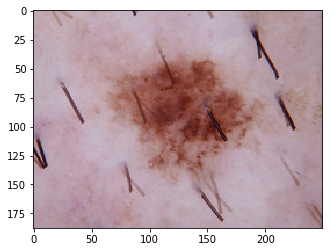

In [57]:
plot_one(PATH, "train/maligmelanoma")
              

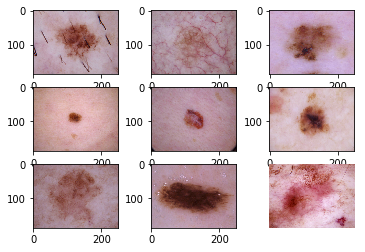

In [24]:
print("malignant melanoma images")
plot_many(PATH, "train/maligmelanoma")

In [28]:
files = os.listdir(f'{PATH}/train/nevi')[:10]; files[:4]

['ISIC_0031768.jpg',
 'ISIC_0031760.jpg',
 'ISIC_0031764.jpg',
 'ISIC_0031767.jpg']

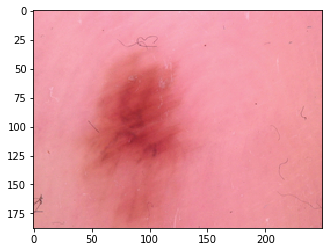

In [34]:
plot_one(PATH, "train/nevi")

Benign nevus images


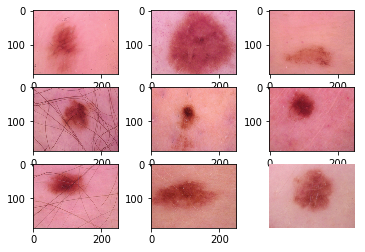

In [35]:
print("Benign nevus images")
plot_many(PATH, "train/nevi")

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(), size=sz, bs=bs).normalize(imagenet_stats)

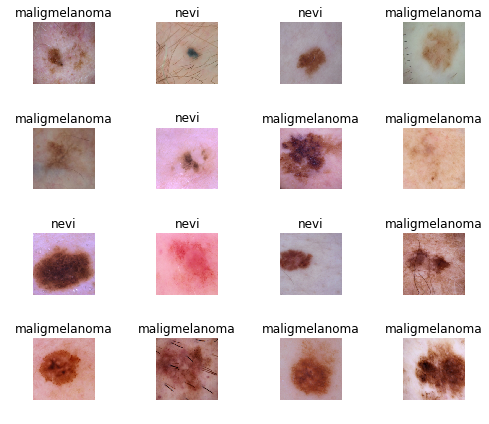

In [60]:
data.show_batch(rows=4, figsize=(7,6))

## Learn

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.model

In [63]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,accuracy,time
0,0.666924,0.655743,0.657702,00:49
1,0.546811,0.620083,0.669927,00:50
2,0.467637,0.569433,0.674817,00:50
3,0.442460,0.580498,0.674817,00:50
4,0.410037,0.591647,0.682152,00:49


In [0]:
interp = ClassificationInterpretation.from_learner(learn)

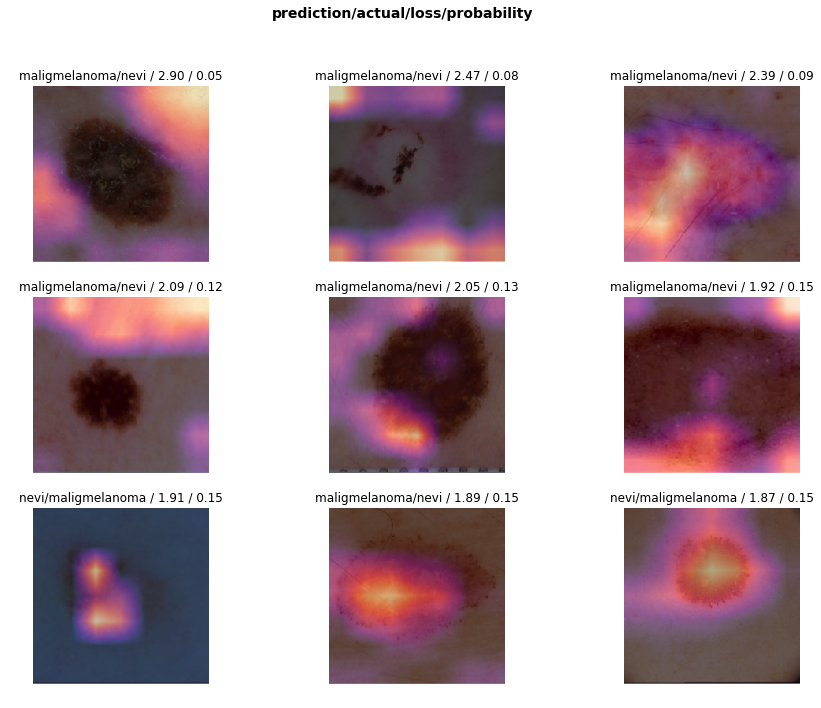

In [66]:
interp.plot_top_losses(9, figsize=(15,11))

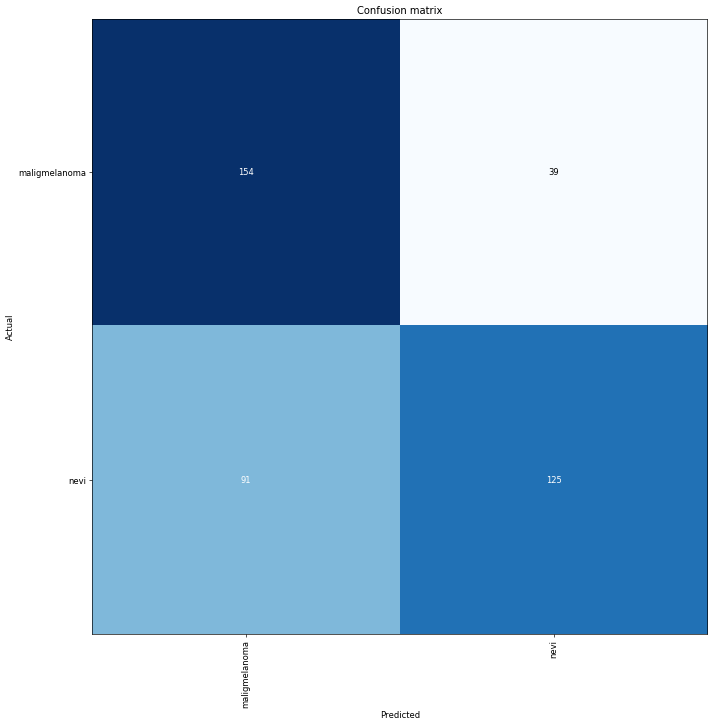

In [65]:
interp.plot_confusion_matrix(figsize=(12,12), dpi=60)

In [0]:
learn.save('stage1')

## Unfreezing

In [0]:
learn.unfreeze()

In [69]:
learn.fit_one_cycle(1)

epoch,train_loss,valid_loss,accuracy,time
0,0.441339,0.623823,0.662592,00:51


## Learning rate finder

In [0]:
learn.load('stage1')

In [71]:
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


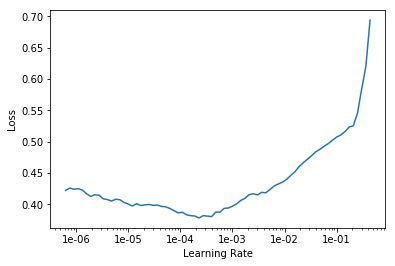

In [72]:
learn.recorder.plot()

In [0]:
learn.unfreeze()

In [74]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.390685,0.572767,0.682152,00:50
1,0.379885,0.577356,0.711491,00:51
2,0.345486,0.581053,0.709046,00:51
3,0.315364,0.590907,0.706601,00:50
4,0.292730,0.608705,0.699266,00:52


In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [77]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-3))

epoch,train_loss,valid_loss,accuracy,time
0,0.415460,0.568333,0.699266,00:53
1,0.388881,0.623397,0.672372,00:51
2,0.349239,0.614405,0.682152,00:51
3,0.308852,0.622236,0.674817,00:52
4,0.281142,0.620754,0.667482,00:50


In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [84]:
learn.fit_one_cycle(5, max_lr=slice(1e-6, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.178904,0.671370,0.674817,00:52
1,0.178722,0.670555,0.684597,00:51
2,0.160023,0.677394,0.677262,00:51
3,0.148110,0.693631,0.682152,00:50
4,0.143853,0.693631,0.684597,00:51


## Data Augmentation

In [0]:
data = ImageDataBunch.from_folder(PATH, ds_tfms=get_transforms(max_rotate=90, do_flip='true', max_zoom=2.0), size=sz, bs=bs).normalize(imagenet_stats)

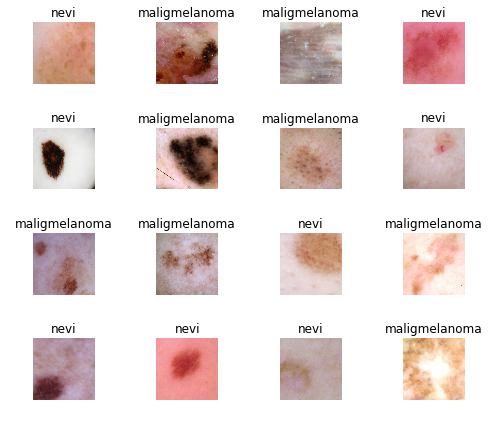

In [94]:
data.show_batch(rows=4, figsize=(7,6))

In [0]:
learn = cnn_learner(data, models.resnet34, metrics=accuracy)

In [0]:
learn.load('stage1')

In [0]:
learn.unfreeze()

In [98]:
learn.fit_one_cycle(5, max_lr=slice(1e-5, 1e-4))

epoch,train_loss,valid_loss,accuracy,time
0,0.461996,0.630517,0.623472,00:54
1,0.437591,0.599039,0.682152,00:52
2,0.410123,0.595813,0.691932,00:54
3,0.389536,0.601143,0.672372,00:53
4,0.365005,0.586295,0.691932,00:52
